# Statistical rethinking - Chapter 3 Practice

## Easy
These problems use the samples from the posterior distribution for the globe tossing example.  is code will give you a speci c set of samples, so that you can check your answers exactly.

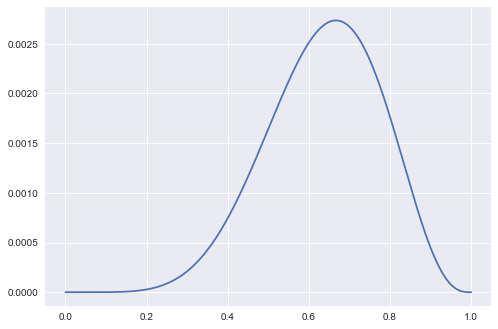

In [52]:
#%% Libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm

# function to create posteriors easily
def posterior_grid_approx(prior, success = 6, tosses = 9):
  grid_points = len(prior)
  p_grid = np.linspace(0, 1, num = grid_points)
  likelihood = stats.binom.pmf(success, tosses, p_grid)
  unstd_posterior = likelihood * prior
  posterior = unstd_posterior / unstd_posterior.sum()
  return p_grid, posterior

n, w = 6,9
grid_points = 1000
prior = np.repeat(1, grid_points)
p_grid, posterior = posterior_grid_approx(prior, success = n, tosses = w)
np.random.seed(100)
samples = np.random.choice(p_grid, size = 10000, replace = True, p = posterior) 
plt.plot(p_grid, posterior)
plt.show()

Use the values in samples to answer the questions that follow.

### 3E1
How much posterior probability lies below p = 0.2?

In [53]:
np.mean(samples < 0.2)

0.001

### 3E2
How much posterior probability lies above p = 0.8?

In [54]:
np.mean(samples >0.8)

0.12089999999999999

### 3E3
How much posterior probability lies between p = 0.2 and p = 0.8?

In [55]:
np.mean((samples > 0.2) & (samples < 0.8))

0.87809999999999999

### 3E4
20% of the posterior probability lies below which value of p?

In [56]:
np.percentile(samples, 20)

0.51551551551551555

### 3E5
20% of the posterior probability lies above which value of p?

In [57]:
np.percentile(samples, 80)

0.75975975975975973

### 3E6
Which values of p contain the narrowest interval equal to 66% of the posterior probability?

In [58]:
pm.hpd(samples, alpha = 1-0.66)

array([ 0.51651652,  0.78878879])

### 3E7
Which values of p contain 66% of the posterior probability, assuming equal posterior probabil- ity both below and above the interval?

In [59]:
np.percentile(samples, [66/2/2, 100-66/2/2])

array([ 0.49149149,  0.77777778])

## Medium
### 3M1
Suppose the globe tossing data had turned out to be 8 water in 15 tosses. Construct the posterior distribution, using grid approximation. Use the same  at prior as before.

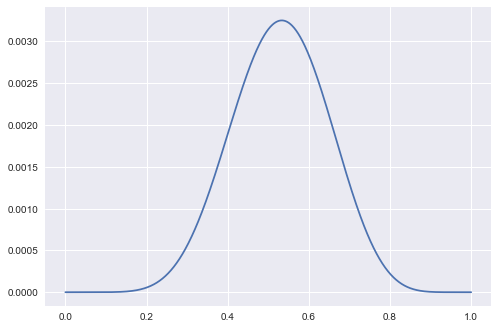

In [60]:
n, w = 8,15
grid_points = 1000
prior = np.repeat(1, grid_points)
p_grid, posterior = posterior_grid_approx(prior, success = n, tosses = w)
plt.plot(p_grid, posterior)
plt.show()

### 3M2
Draw 10,000 samples from the grid approximation from above. Then use the samples to calculate the 90% HPDI for p.

In [61]:
np.random.seed(100)
samples = np.random.choice(p_grid, size = 10000, replace = True, p = posterior) 
pm.hpd(samples, alpha = 0.1)

array([ 0.33733734,  0.72572573])

### 3M3
Construct a posterior predictive check for this model and data.  is means simulate the distri- bution of samples, averaging over the posterior uncertainty in p. What is the probability of observing 8 water in 15 tosses?

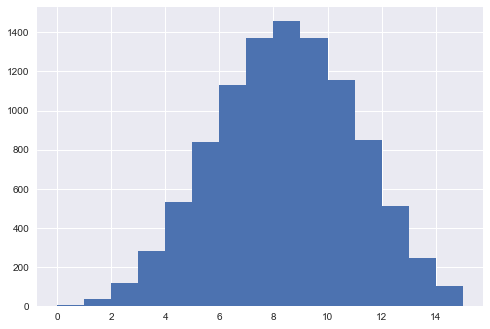

0.14580000000000001

In [62]:
n = 15
w = stats.binom.rvs(n = n, p = samples)
plt.hist(w, bins = n)
plt.show()
np.mean(w == 8)

### 3M4
Using the posterior distribution constructed from the new (8/15) data, now calculate the probability of observing 6 water in 9 tosses

In [63]:
w = stats.binom.rvs(n = 9, p = samples)
np.mean(w == 6)

0.1729

### 3M5
Start over at 3M1, but now use a prior that is zero below p = 0.5 and a constant above p = 0.5. This corresponds to prior information that a majority of the Earth’s surface is water. Repeat each problem above and compare the inferences. What difference does the better prior make? If it helps, compare inferences (using both priors) to the true value p = 0.7.

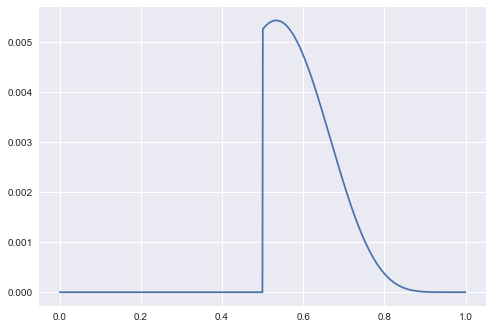

array([ 0.5005005 ,  0.71271271])

In [64]:
n, w = 8,15
grid_points = 1000
prior = np.linspace(0,1, num = grid_points) >= 0.5
prior = prior.astype(int)
p_grid, posterior = posterior_grid_approx(prior, success = n, tosses = w)
plt.plot(p_grid, posterior)
plt.show()
np.random.seed(100)
samples = np.random.choice(p_grid, size = 10000, replace = True, p = posterior) 
pm.hpd(samples, alpha = 0.1)

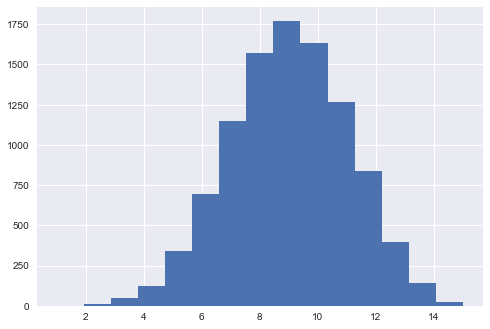

0.15690000000000001

In [65]:
n = 15
w = stats.binom.rvs(n = n, p = samples)
plt.hist(w, bins = n)
plt.show()
np.mean(w == 8)

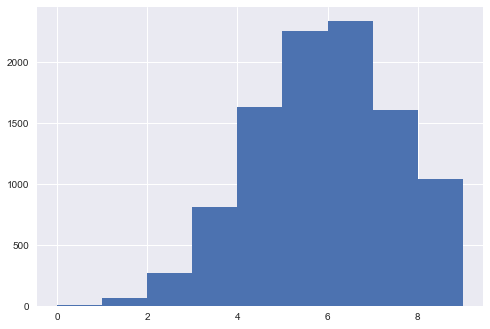

0.23350000000000001

In [66]:
n = 9
w = stats.binom.rvs(n = n, p = samples)
plt.hist(w, bins = n)
plt.show()
np.mean(w == 6)

## Hard
The practice problems here all use the data below. These data indicate the gender (male=1, female=0) of o cially reported  rst and second born children in 100 two-child families.


In [67]:
birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,0,1,1,1,1])
birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,0,0])

So for example, the  rst family in the data reported a boy (1) and then a girl (0). The second family reported a girl (0) and then a boy (1). The third family reported two girls. Use these vectors as data.
### 3H1
Using grid approximation, compute the posterior distribution for the probability of a birth being a boy. Assume a uniform prior probability. Which parameter value maximizes the posterior probability?

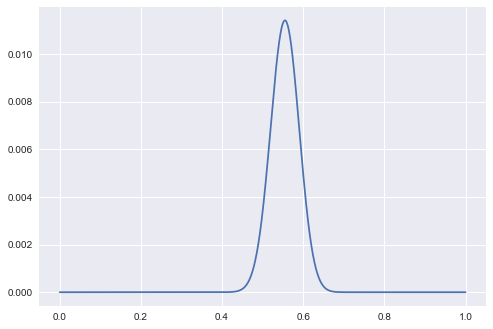

array([ 0.55455455])

In [68]:
n, w = sum(birth1) + sum(birth2) ,len(birth1) + len(birth2)
grid_points = 1000
prior = np.repeat(1, grid_points)
p_grid, posterior = posterior_grid_approx(prior, success = n, tosses = w)
plt.plot(p_grid, posterior)
plt.show()
p_grid[posterior == max(posterior)]

### 3H2
Using the sample function, draw 10,000 random parameter values from the posterior distribution you calculated above. Use these samples to estimate the 50%, 89%, and 97% highest posterior density intervals.

In [69]:
samples = np.random.choice(p_grid, size = 10000, replace = True, p = posterior) 
alphas = [0.50, 1-0.89, 1-0.97]
[pm.hpd(samples, alpha = i) for i in alphas]

[array([ 0.53053053,  0.57757758]),
 array([ 0.5005005 ,  0.61161161]),
 array([ 0.47147147,  0.62262262])]

### 3H3
Use rbinom to simulate 10,000 replicates of 200 births. You should end up with 10,000 numbers, each one a count of boys out of 200 births. Compare the distribution of predicted numbers of boys to the actual count in the data (111 boys out of 200 births). There are many good ways to visualize the simulations, but the dens command (part of the rethinking package) is probably the easiest way in this case. Does it look like the model fits the data well? That is, does the distribution of predictions include the actual observation as a central, likely outcome?

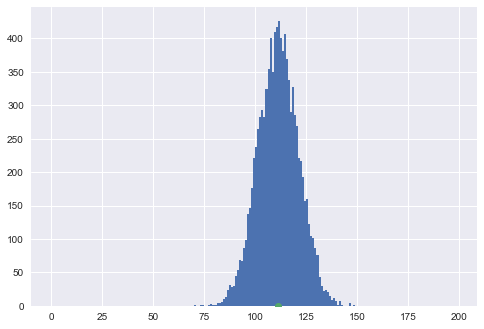

In [70]:
w = stats.binom.rvs(200, samples)
plt.hist(w, bins = range(200))
plt.plot(n, 0, 'o')
plt.show()

The model fits well the data

### 3H4
Now compare 10,000 counts of boys from 100 simulated first borns only to the number of boys in the first births, `birth1`. How does the model look in this light?

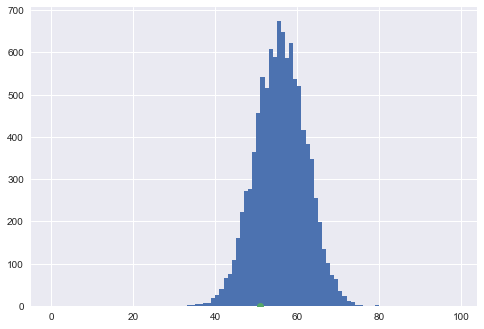

In [71]:
w = stats.binom.rvs(100, samples)
plt.hist(w, bins = range(100))
plt.plot(sum(birth1), 0, 'o')
plt.show()

The model doesn't fit as well

### 3H5
The model assumes that sex of  rst and second births are independent. To check this assumption, focus now on second births that followed female first borns. Compare 10,000 simulated counts of boys to only those second births that followed girls. To do this correctly, you need to count the number of first borns who were girls and simulate that many births, 10,000 times. Compare the counts of boys in your simulations to the actual observed count of boys following girls. How does the model look in this light? Any guesses what is going on in these data?

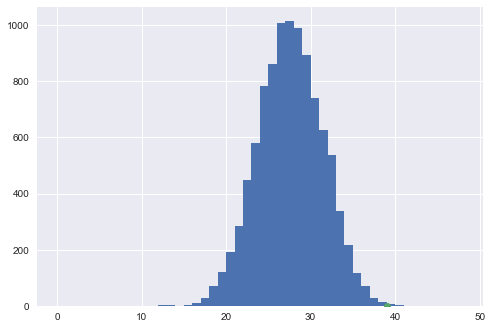

In [72]:
n_girls_first = sum(birth1 == 0)
w_girls = stats.binom.rvs(n_girls_first, samples)
plt.hist(w_girls, bins = range(n_girls_first))
n_boys_sec_empirical = sum((birth1 == 0) & (birth2 == 1))
plt.plot(n_boys_sec_empirical, 0, 'o')
plt.show()

The model doesn't fit well at at. Second births appear not to be independent from first births. Data suggest is more likely to have a boy after having a girl